In [2]:
import numpy
from root_numpy import root2array, tree2array
#from root_numpy.testdata import get_filepath
import ROOT
ROOT.enableJSVis()

# Fill a ROOT histogram from a NumPy array
from ROOT import TH1D,TH2D
from root_numpy import fill_hist
from ROOT import TCanvas

Welcome to JupyROOT 6.08/06


In [18]:
#filename = "/Users/artur/cernbox/HGCAL/sk2cms/hexaboard_v0/data/hexa1/Hexaboard_1_d1_1ms_new.root"
#filename = "/Users/artur/cernbox/HGCAL/sk2cms/hexaboard_v0/data/hexa2/Hex2_RUN_060417_1144_lowfreq_new.root"
#filename = "/Users/artur/cernbox/HGCAL/sk2cms/hexaboard_v0/data/hexa4/Hex4_RUN_070417_1106_new.root"
#filename = "/Users/artur/cernbox/HGCAL/sk2cms/hexaboard_v0/data/Acquisitions/Hex4_fixed_chip3_noise_new.root"
#filename = "/Users/artur/Work/LLR/HGCAL/Testbeam/data/may17/RUN_100417_1321_new.root"
#filename = "/Users/artur/Work/LLR/HGCAL/Testbeam/data/may17/RUN_0172_070517_1726.root"
#filename = "../data/hex_sensor/RUN_090517_0928.root"
filename = "/Users/artur/Work/LLR/HGCAL/Testbeam/data/may17/data_sensor/RUN_2000_090517_1211.root"

# Convert a TTree in a ROOT file into a NumPy structured array
array = root2array(filename, 'sk2cms')
# The TTree name is always optional if there is only one TTree in the file

# Or first get the TTree from the ROOT file
#rfile = ROOT.TFile(filename)
#rfile.ls()
#intree = rfile.Get('sk2cms')
#intree.Print()

# and convert the TTree into an array
#array = tree2array(intree)

In [19]:
#for i in range(len(array[0])): print array[0][i]
array.dtype.names
array['event']

array([    0,     1,     2, ..., 24997, 24998, 24999], dtype=int32)

In [20]:
i = 4
event = array[i][0]
roll = array[i][2]
hg = array[i][3]
lg = array[i][4]
#tot_fast = array[i][5]

In [21]:
#hg

In [22]:
hg.shape

(4, 13, 64)

In [23]:
hg[0,:,0] # single channel data for all SCAs (chip 0, event i)

array([48, 13, 48, 54, 15,  0, 27,  0, 68,  0, 12, 27, 25], dtype=int32)

In [24]:
data = []
chip = 0
chan = 10
for i in range(len(array)):
    roll = array[i][2]
    if not (roll[12] == roll[11] == 1): continue
    gain = array[i][3] # 3 for HG, 4 for LG
    #data.append((1-roll)* hg[0,:,0])
    data.append(gain[chip,:,chan])

In [25]:
data = numpy.array(data)
data = data.T
#data = numpy.transpose(data)
len(data[0])

1999

In [26]:
corr_matr = numpy.corrcoef(data)
corr_matr[0]

array([ 1.        , -0.34258062,  0.27887998, -0.13182064,  0.03005213,
        0.13623245, -0.07969175,  0.11864796, -0.14940996,  0.1084783 ,
       -0.11102784,  0.12489937, -0.09891083])

In [27]:
hist1d = ROOT.TH1D('h1', 'title', 13,-25/2.,12*25+25/2.)
hist2d = ROOT.TH2D('h2', 'title', 13,0,13,13,0,13)

for i in range(13):
    #print corr_matr[0][i]
    hist1d.SetBinContent(i+1,corr_matr[0][i])
    for j in range(13):
        hist2d.SetBinContent(i,j,corr_matr[i][j])

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


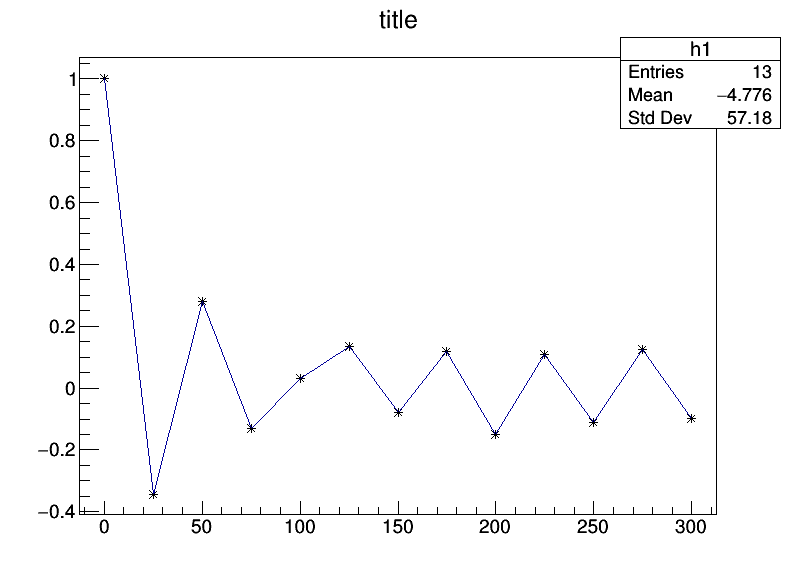

In [28]:
canv = TCanvas("canv","canv",800,600)
hist1d.Draw("p*l")
#hist2d.Draw("colz")
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv2


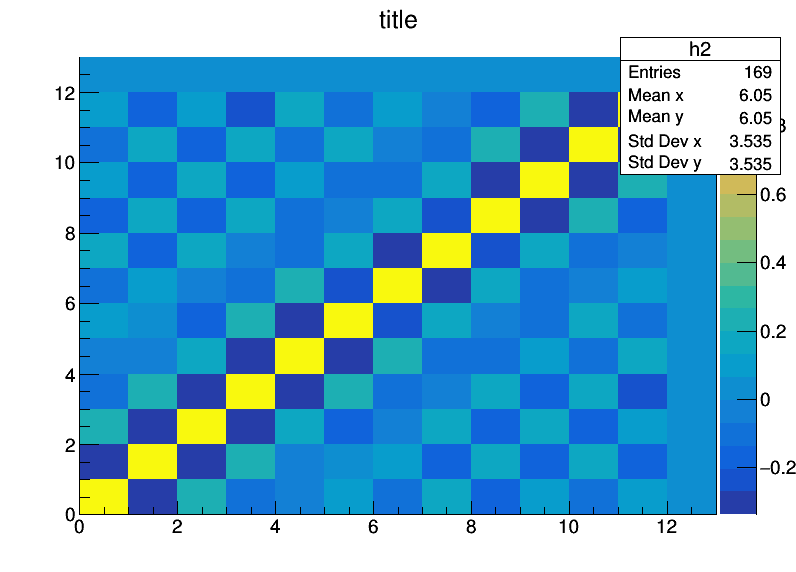

In [29]:
canv2 = TCanvas("canv2","canv",800,600)
#hist1d.Draw("")
hist2d.Draw("colz")
canv2.Draw()

In [30]:
chip = 0
hists = []
for chan in range(64):
    
    data = []
    # retrieve data
    for i in range(len(array)):
        roll = array[i][2]
        if not (roll[12] == roll[11] == 1): continue
        hg = array[i][3]
        data.append(hg[chip,:,chan])
    
    data = numpy.array(data).T
    corr_matr = numpy.corrcoef(data)
    
    hname = "h_chip_%i_chan_%i" %(chip,chan)
    hist = ROOT.TH1D(hname, hname, 13,-25/2.,12*25+25/2.)
    for i in range(13):    hist.SetBinContent(i+1,corr_matr[0][i])
    
    ROOT.SetOwnership(hist,0)
    hists.append(hist)

Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_5 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_6 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_7 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_8 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_9 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_chip_0_chan_10 (

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


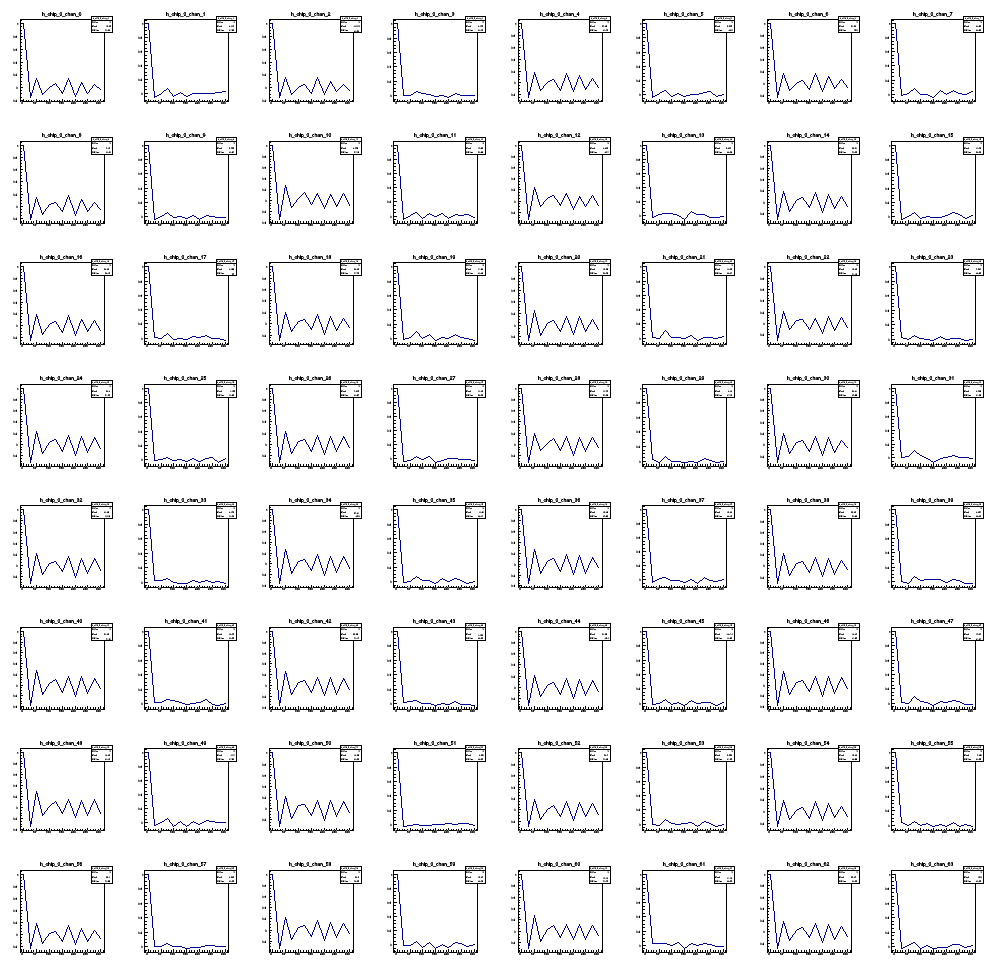

In [31]:
ROOT.disableJSVis()
canv = TCanvas("canv","canv",1000,1000)
canv.Divide(8,8)

for i,hist in enumerate(hists):
    canv.cd(i+1)
    hist.Draw("pl")
    
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


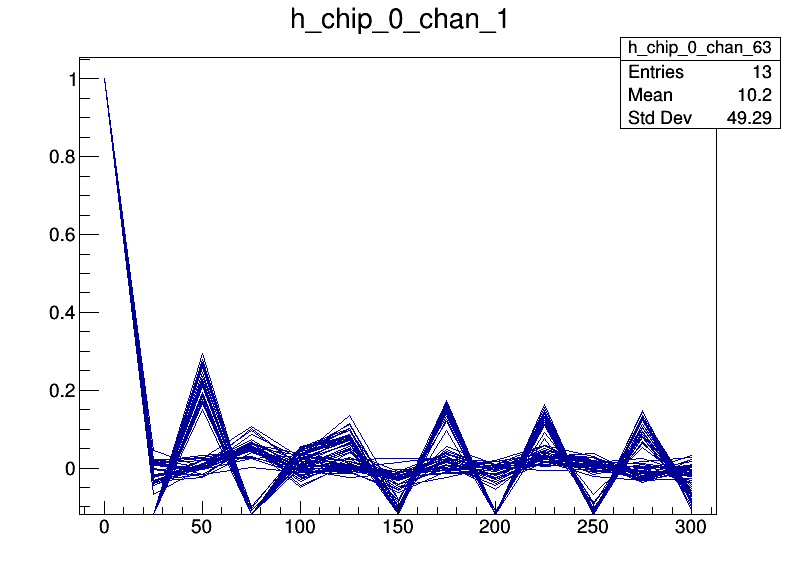

In [32]:
ROOT.disableJSVis()
#ROOT.enableJSVis()

canv = TCanvas("canv","canv",800,600)

hists[1].Draw("pl")
for i,hist in enumerate(hists):
    if i == 0: continue
    if i == 28: continue
    hist.Draw("pl same")
    
canv.Draw()